### Predicting Customer Churn

### Identifying Customer that are susceptible to Churn(leave) in order to enhance retention strategies and boost Sales/Business Growth

### Import packages and libriries


In [1]:
from ast import literal_eval  #literal_eval allows  computation on strings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #to visualize
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier  #helps predict
from tqdm import tqdm  #helps visualize the progession of loops and action in python

import warnings      #to avoid seeing warings in pandas packages
warnings.filterwarnings('ignore')


In [2]:
#data collection
#Load the dataset into Python with pandas
df = pd.read_excel("Dataset.xlsx")

#### Data Exploration

  In this section:
  - understanding the data structure, statictics and quality of the dataset
  - visualizing the data to gain insughts
  - checking for missing values

In [3]:
#show the fisrt 5 rows of the dataset
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,"[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,"[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,"[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,"[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [4]:
#handling missing vales
missing_values = df.isnull().sum()
missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

In [5]:
#check for duplicate values
df.duplicated().any()


False

In [6]:
#stattistics overview of the  numerial values of the dataset
df.describe()

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


#### How the target varible, CHURN LABEL are distributed

<function matplotlib.pyplot.show(close=None, block=None)>

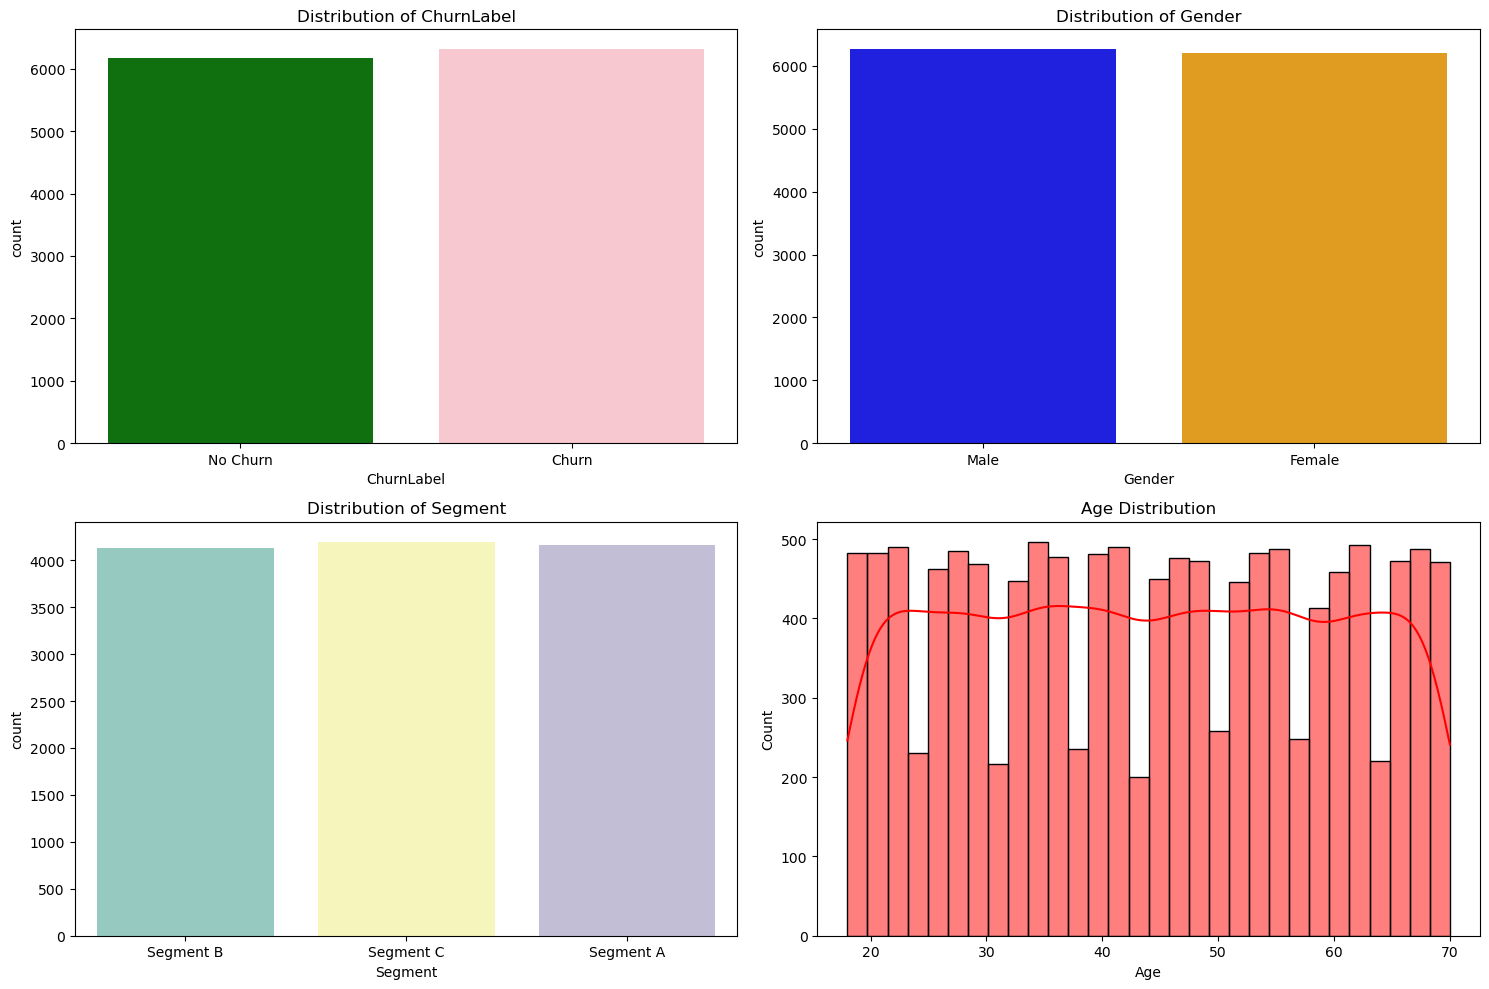

In [7]:
#setup the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize= (15, 10))

#Plot the distribution of the target variable ChurnLabel
sns.countplot(x='ChurnLabel', data=df, ax=ax[0,0], palette=['green', 'pink'])   #counts the num of each label(0,1)
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0, 0].set_xticklabels(['No Churn', 'Churn'])

#Plot distribution of the Gender
sns.countplot(x='Gender', data=df, ax=ax[0, 1],  palette=['blue', 'orange'])
ax[0, 1].set_title('Distribution of Gender')

#Plot distribution  of Segment
sns.countplot(x='Segment', data=df, ax=ax[1, 0], palette='Set3')
ax[1, 0].set_title('Distribution of Segment')

#Age distribution
sns.histplot(df['Age'], bins=30, ax=ax[1, 1], kde=True, color='red')
ax[1, 1].set_title('Age Distribution')            

plt.tight_layout()
plt.show


#### Correlation Analysis: Which columns in the dataset correlates with the 'ChurnLabel' column.

<function matplotlib.pyplot.show(close=None, block=None)>

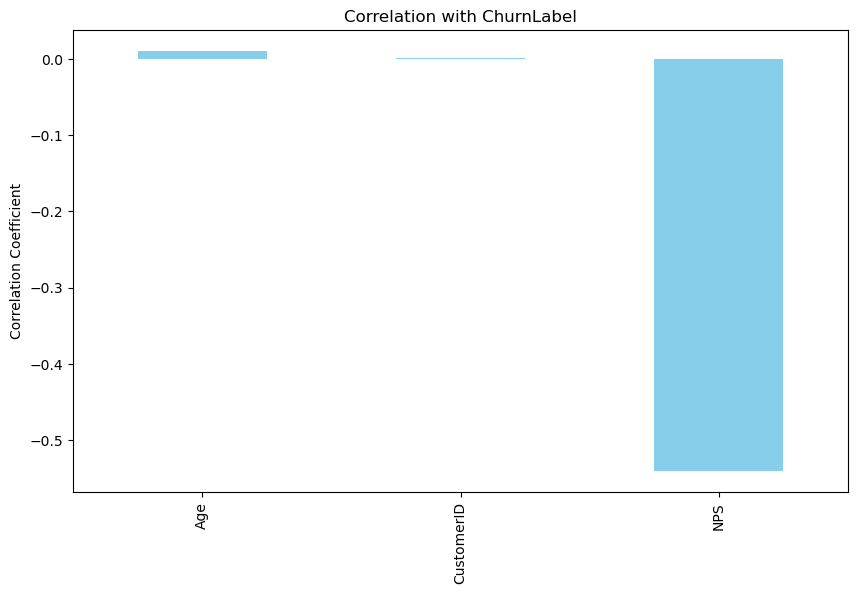

In [8]:
#Calculate the correlation with the ChurnLabel
correlation = df.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False) #numbers(float,integer) helps with correlation while strings gives error

#Plot the correlation
plt.figure(figsize=(10, 6))
correlation.drop('ChurnLabel').plot(kind='bar', color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show

#### I am exploring the nested columns and see how they are nested to further explore the dataset

In [9]:
#List out the nested columns
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

#Print the fisrt value in each of the columns for a detailed view
w1, w2 = 25, 1000#(width , name)
for col in nested_columns:
    row = [col, df[col][0]]
    print ('\n| {:<{w1}} | {:<{w2}} | '.format(*row, w1=w1, w2=w2))



| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

**Temporal Analysis: I looked at how the Churn rate chances over time to see if there are any reoccuring patterns**

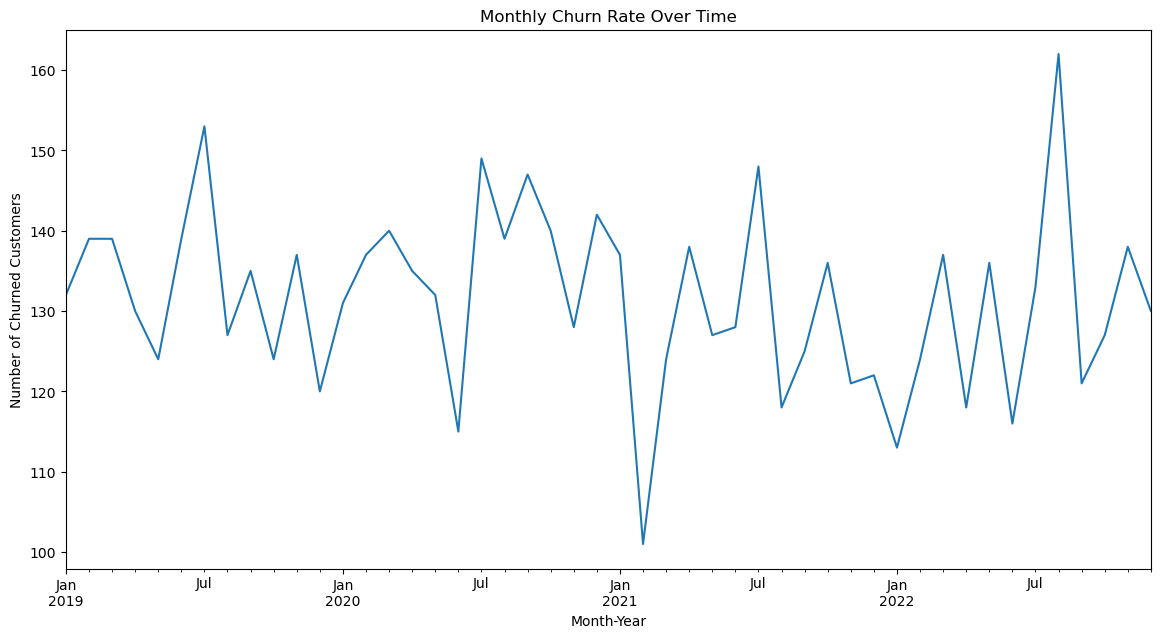

In [10]:
#Convert Timestamp to datatime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#Extract the month-year from the Timestamp
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

# Group by MonthYear and calculate the churn rate
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

# Plot the Churn rate over time
plt.figure(figsize=(14,7))
monthly_churn_rate.plot()
plt.title('Monthly Churn Rate Over Time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Month-Year')
plt.show()

I need to see if there are any patterns between the customers feedback (Rating) and the ChurnLabel

<function matplotlib.pyplot.show(close=None, block=None)>

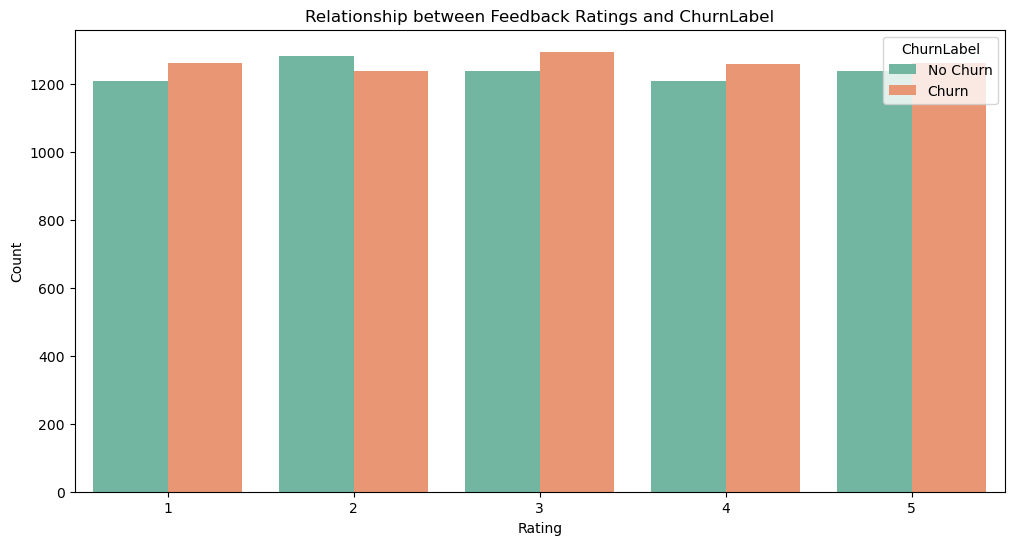

In [11]:
# Extract the ratings from the feedback column and create a new column for it
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])  #eval convert strings in d column to actual list

# Plot the relationship btwn feedback rating and Churnlabel
plt.figure(figsize=(12, 6))
sns.countplot(x='FeedbackRating', data=df, hue='ChurnLabel', palette='Set2')
plt.title('Relationship between Feedback Ratings and ChurnLabel')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'ChurnLabel', loc='upper right', labels=['No Churn', 'Churn'])
plt.show

#### The visuals shows there isn't much indiction that feedback rating affects the Churn rate based on the positive or negative ratings

## Data Preprocessing & Feature Engineering
### Here I will be:
- create new fetaure that may have predictive power,
- convert categorical variable to numeric variables, using encoding techniques,
- scaling or normalize numeric variables where necessary,
- split data into train & test subsets
- remove irrelevant features.

I will start by converting the nested values from string formats to ist/ictionaries using the literal_eval function

In [12]:
#Listing out the nested columns
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'
]

#Applying the literal_eval function to lconvert to list/dict
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

More features to be extarced from the dataset

In [13]:
# PurchaseHistory extracts all product purchased
df['PurchasProducts'] = df['PurchaseHistory'].apply(lambda x: '|'.join([i['Product'] for i in x]))
df['PurchaseFrequency'] = df['PurchaseHistory'].apply(lambda x: sum([i['Frequency'] for i in x]))
df['PurchaseValue'] = df['PurchaseHistory'].apply(lambda x: sum([i['Value'] for i in x]))

#SubscriptionDetails
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEndDate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEndDate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

#WebsiteUsage  
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews']) 
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

#EngagementMetrics
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency']) 

#Feedbacks
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])                                                                           

#MarketingCommunication
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))                                                                       
df['MarketingCommunicationOpenClickDiff'] =df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) \
        - pd.to_datetime(i['Email_Opened'])).days for i in x
    ])
)                                                                           
df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) \
         - pd.to_datetime(i['Email_Sent'])).days for i in x
    ])
)                                                                        
                                                                         
                                                                           

Special Extraction from three columns:
- ServivceInteractions,
- PaymentHistory,
- ClickstreamData.

Check for the unique parameters/values in these columns.

In [14]:
# Get all unique ServiceInteraction 'Types'
service_interaction_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_type = []
for i in service_interaction_types:
    unique_service_interaction_type.extend(i)
unique_service_interaction_type = list(set(unique_service_interaction_type))
print('All unique Service Interaction Types:', unique_service_interaction_type)

#Get all unique PaymentHistory 'Method'
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique Payment History Methods:', unique_payment_history_methods)

#Get all unique ClickstreamData 'Action'
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All unique Clickstream Data Actions:', unique_clickstream_data_actions)


All unique Service Interaction Types: ['Chat', 'Call', 'Email']
All unique Payment History Methods: ['PayPal', 'Bank Transfer', 'Credit Card']
All unique Clickstream Data Actions: ['Add to Cart', 'Search', 'Click']


FROM THESE THREE COLUMNS, I WILL FUTHER ENCODE MORE

In [15]:
#ServiceInteractions
for usit in unique_service_interaction_type:
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))

# Payment History
df['PaymentHistoryNoOfPayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

#ClickStreamData
for ucda in unique_clickstream_data_actions:
    df[f'ClickStreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda ]))

See a subset of the new data

In [16]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Chat,ServiceInteractions_Call,ServiceInteractions_Email,PaymentHistoryNoOfPayments,PaymentHistoryAvgNoOfLatePayments,ClickStreamData_Add to Cart,ClickStreamData_Search,ClickStreamData_Click
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...",...,319.0,818.0,2,1,1,40,13.333333,8,12,4
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...",...,88.0,110.0,4,5,10,10,3.333333,8,7,9
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...",...,117.0,333.0,1,1,1,8,2.666667,2,7,3
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...",...,423.0,159.0,24,17,18,79,26.333333,15,16,16
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...",...,96.0,193.0,1,4,5,2,0.666667,17,4,9


See all columns 

In [17]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Chat',
       'ServiceInteractions_Call', 'ServiceInteractions_Email',
       'PaymentHistoryNoOfPayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickStreamData_Add to C

Pick out some Columns

In [18]:
df_ = df[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff', 
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat', 
    'ServiceInteractions_Call',
    'PaymentHistoryNoOfPayments',
    'ClickStreamData_Search',
    'ClickStreamData_Click',
    'ClickStreamData_Add to Cart',
    'SubscriptionDuration'
]]

df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,...,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Email,ServiceInteractions_Chat,ServiceInteractions_Call,PaymentHistoryNoOfPayments,ClickStreamData_Search,ClickStreamData_Click,ClickStreamData_Add to Cart,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,...,319.0,818.0,1,2,1,40,12,4,8,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,...,88.0,110.0,10,4,5,10,7,9,8,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,...,117.0,333.0,1,1,1,8,7,3,2,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,...,423.0,159.0,18,24,17,79,16,16,15,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,...,96.0,193.0,5,1,4,2,4,9,17,580


Let's see the name of the columne we have now

In [19]:
df_.columns

Index(['Age', 'Gender', 'NPS', 'ChurnLabel', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackRating',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Email',
       'ServiceInteractions_Chat', 'ServiceInteractions_Call',
       'PaymentHistoryNoOfPayments', 'ClickStreamData_Search',
       'ClickStreamData_Click', 'ClickStreamData_Add to Cart',
       'SubscriptionDuration'],
      dtype='object')

In [20]:
df_.loc[0] #this shows if all column values are in numeric numbers suitbale for ot ML metrics

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                       Express
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency              Weekly
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
ServiceInteractions_Call                     1
PaymentHistoryNoOfPayments                  40
ClickStreamData_Search                      12
ClickStreamData_Click                        4
ClickStreamDa

We need to encode all varibles in strings to numenical value to be able to use our ML prediction metrics. Also to check if we have exccess varibles to be encoded.

Now Checking for unique values in each column

In [21]:
print('Total datset length', len(df_))

df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total datset length 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

Encoding the string parameters.

In [22]:
#Gender encoding
gender_map = {'Male': 0, 'Female': 1}

#Subcription encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

#EngagementMetricsFrequency
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

#Encode
df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)




In [23]:
df_.loc[0]

Age                                         31
Gender                                       0
NPS                                          3
ChurnLabel                                   1
PurchaseFrequency                           38
PurchaseValue                          3994.72
SubscriptionPlan                             0
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency                   0
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
ServiceInteractions_Call                     1
PaymentHistoryNoOfPayments                  40
ClickStreamData_Search                      12
ClickStreamData_Click                        4
ClickStreamDa

Plot correlation Matrix

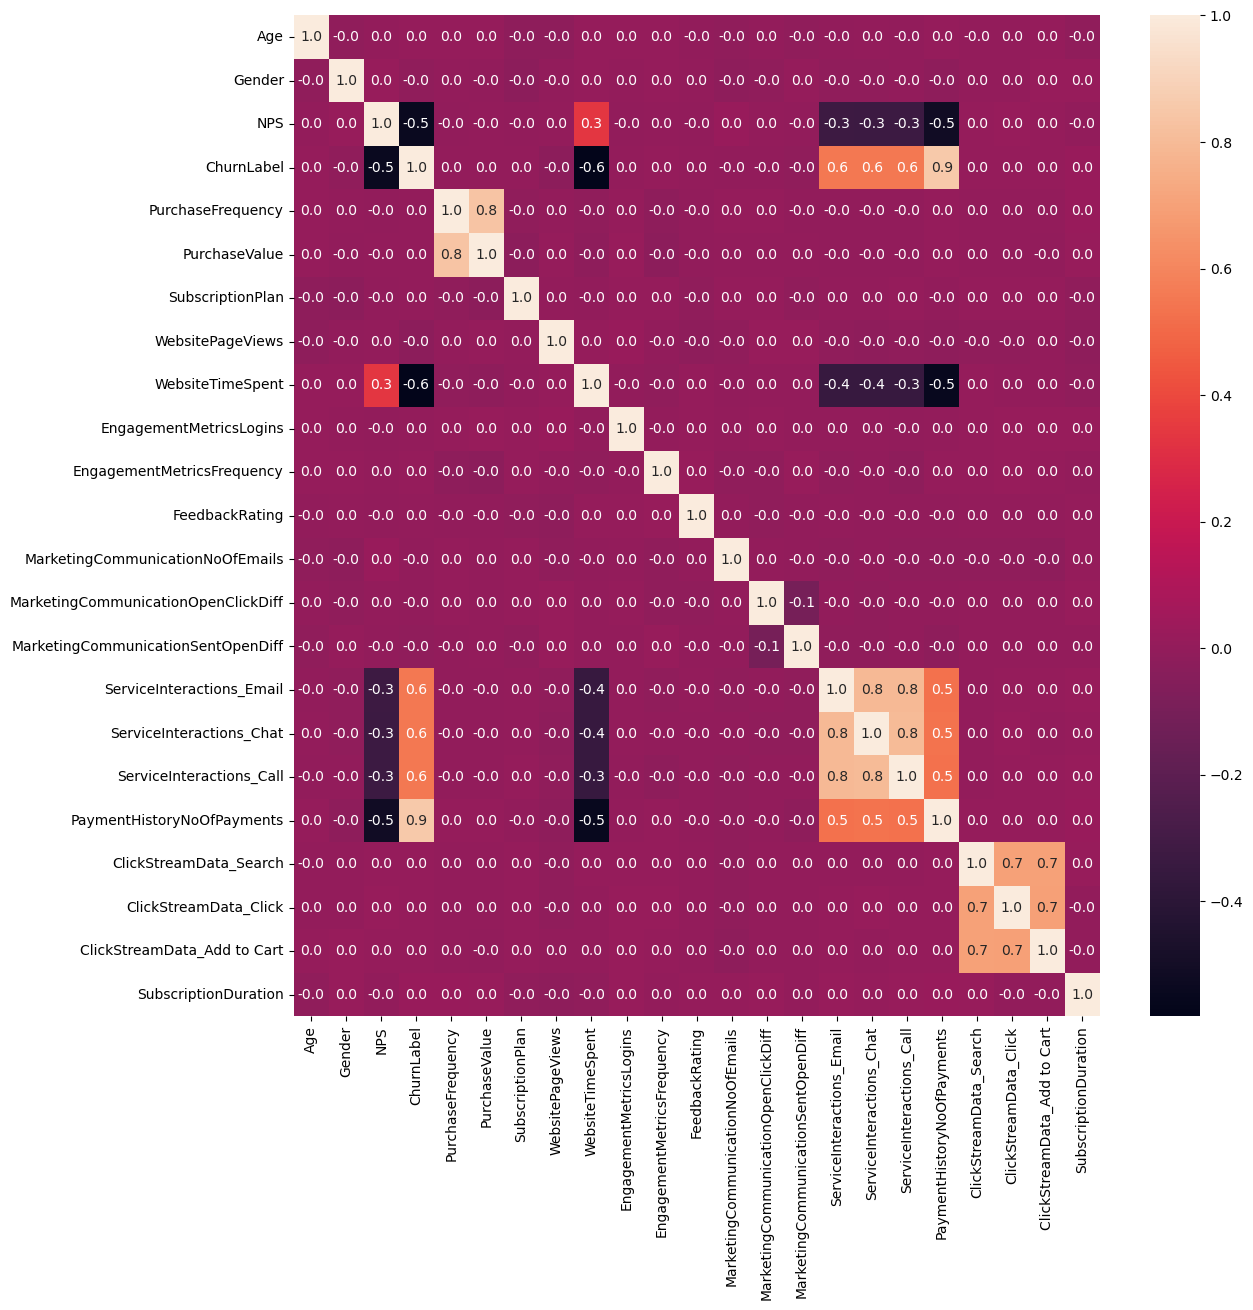

In [24]:
df_corr = df_.corr()
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df_corr, annot=True, fmt='.1f', ax=ax)
plt.show()

Split data into train, test and validation sets.

In [25]:
X = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']

X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

In [29]:
ss= StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

### Modelling

Two different models for modelling:
- LogisticRegression,
- DecisionTreeClassifier.

Metrics:
- Accuracy score,
- Precision score,
- Recall score,
- F1 score.

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(X, y, model, subset=''):
    y_pred = model.predict(X)

    print(f'{subset} Accuracy Score: {accuracy_score(y, y_pred)}')
    print(f'{subset} Precision Score: {precision_score(y, y_pred)}')
    print(f'{subset} Recall Score: {recall_score(y, y_pred)}')
    print(f'{subset} F1 Score: {f1_score(y, y_pred)}')

## Modelling with Logoistic Regression

In [38]:
#Build the model
lr = LogisticRegression()
lr.fit(X_train, y_train)



# Evaluate the model on train and validation subsets
evaluate(X_train, y_train, lr, 'Train')
evaluate(X_val, y_val, lr, 'Validation')

Train Accuracy Score: 0.9709593430803124
Train Precision Score: 0.9767071471232331
Train Recall Score: 0.965938176806458
Train F1 Score: 0.9712928133042962
Validation Accuracy Score: 0.968
Validation Precision Score: 0.9643835616438357
Validation Recall Score: 0.9696969696969697
Validation F1 Score: 0.967032967032967


#### Modelling with Decision Tree

In [46]:
    #Build the model
    dt = DecisionTreeClassifier(max_depth=5)
    dt.fit(X_train, y_train)
/

    # Evaluate on the train and validation subsets
    evaluate(X_train, y_train, dt, subset='Train')
    evaluate(X_val, y_val, dt, subset='Validation')

Train Accuracy Score: 0.9768676146605247
Train Precision Score: 0.9775413711583925
Train Recall Score: 0.9769639692852924
Train F1 Score: 0.9772525849335303
Validation Accuracy Score: 0.968
Validation Precision Score: 0.9643835616438357
Validation Recall Score: 0.9696969696969697
Validation F1 Score: 0.967032967032967


#### Evaluation on the Test Set

In [47]:
evaluate(X_test, y_test, lr, 'LogisticsRegression Test')
evaluate(X_test, y_test, dt, 'DecisionTreeClassifier Test')

LogisticsRegression Test Accuracy Score: 0.9690898683457355
LogisticsRegression Test Precision Score: 0.9733796296296297
LogisticsRegression Test Recall Score: 0.9644495412844036
LogisticsRegression Test F1 Score: 0.9688940092165899
DecisionTreeClassifier Test Accuracy Score: 0.9725243274184316
DecisionTreeClassifier Test Precision Score: 0.9735632183908046
DecisionTreeClassifier Test Recall Score: 0.9713302752293578
DecisionTreeClassifier Test F1 Score: 0.9724454649827784


#### Plotting Confusion Matrix

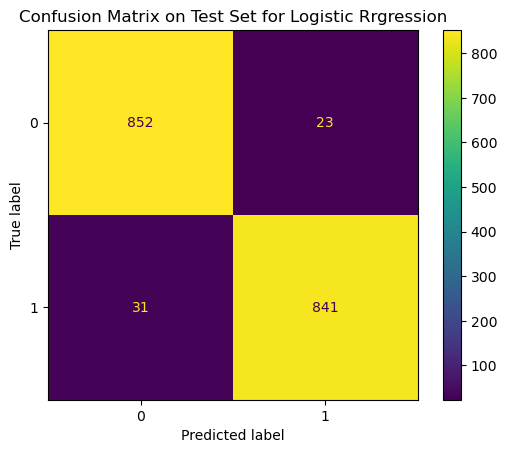

In [49]:
lr_y_pred = lr.predict(X_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Logistic Rrgression')
plt.show()

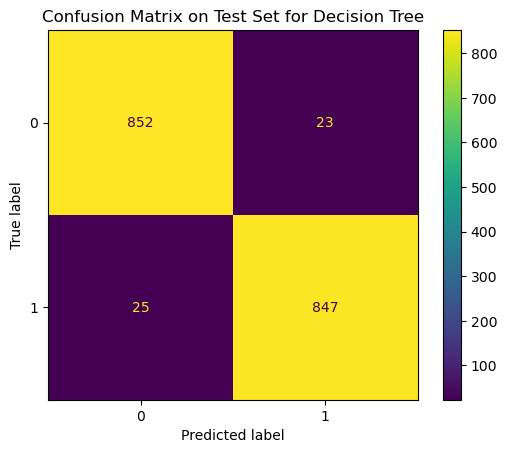

In [51]:
dt_y_pred = dt.predict(X_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix=decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Decision Tree')
plt.show()

## Conclusion
The most important Features the affects and correlates Churn Label are:
- The number of service interaction the customer had through Call Email, Chat,
- The number of times the customers has made last payments,
- The time customer spents on the company websites,
- The NET Promoter Score (NPS).